In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random

%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [39]:
flagged = pd.read_csv("./data_flag/data_flag.csv")
flagged.shape

(1111490, 9)

In [40]:
flagged[flagged['Flag']==0].head()

,Depth,Latitude,Location,Longitude,Temperature,Timestamp,Flag,new_temp,Reference
0,15.0,33.4661,EagleRock,-118.5951,17.335,2004-06-26 07:00:00,0,17.335,NaN
1,15.0,33.4661,EagleRock,-118.5951,18.215,2004-06-26 08:00:00,0,18.215,NaN
2,15.0,33.4661,EagleRock,-118.5951,18.380,2004-06-26 09:00:00,0,18.380,NaN
3,15.0,33.4661,EagleRock,-118.5951,18.460,2004-06-26 10:00:00,0,18.460,NaN
4,15.0,33.4661,EagleRock,-118.5951,18.620,2004-06-26 11:00:00,0,18.620,NaN


In [41]:
flagged['Flag'].value_counts()

0    979128
1     55967
2     47684
3     28711
Name: Flag, dtype: int64

In [42]:
required = flagged[flagged['Flag']==0]
required = required.drop(['Reference','Latitude','Longitude'],axis=1)
required.shape

(979128, 6)

In [43]:
required.groupby(['Location','Depth']).size().unstack()

Depth,15.0,30.0,40.0,60.0,100.0
Location,,,,,
CasinoPoint,NaN,NaN,21011.0,NaN,NaN
CatHarbor,NaN,1229.0,NaN,NaN,NaN
EagleRock,39364.0,27976.0,8003.0,39643.0,NaN
EastEnd,59516.0,47190.0,NaN,56133.0,NaN
LittleHarbor,32328.0,74209.0,NaN,67566.0,NaN
WIES,119369.0,41407.0,27149.0,109832.0,113147.0
WestEnd,27196.0,39112.0,NaN,27748.0,NaN


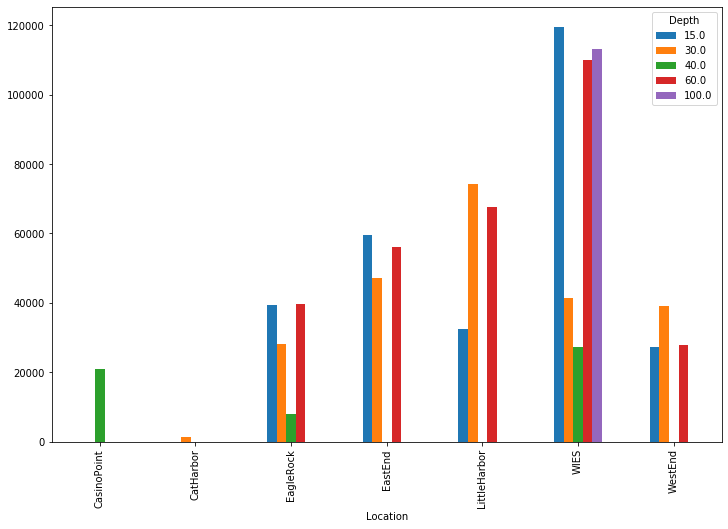

In [44]:
required.groupby(['Location','Depth']).size().unstack().plot(kind = "bar", width=0.5, figsize=(12,8))

In [49]:
perc = [0.05,0.25,0.5,0.75,0.95]
required.loc[required.Depth==15].groupby(['Location'])['Temperature'].describe(percentiles = perc)

,count,mean,std,min,5%,25%,50%,75%,95%,max
Location,,,,,,,,,,
EagleRock,39364.0,17.311284,2.956293,10.24,13.495,15.127,16.8440,18.9130,22.995,27.739
EastEnd,59516.0,16.478849,2.098987,10.28,13.550,14.950,16.1725,17.9900,20.100,27.600
LittleHarbor,32328.0,17.332500,3.277870,7.00,12.100,14.815,17.2310,19.9000,22.255,28.000
WIES,119369.0,17.657198,2.477442,10.00,14.160,15.300,17.7000,19.6945,21.700,28.000
WestEnd,27196.0,16.175316,2.549442,7.00,12.400,14.500,15.5000,18.3000,20.600,28.000


In [50]:
required['DateTime'] = pd.to_datetime(required['Timestamp'])
required['year']=[x.year for x in required['DateTime']]
required['month']=[x.month for x in required['DateTime']]
required['day']=[x.day for x in required['DateTime']]
required['hours']=[x.hour for x in required['DateTime']]
required['minutes']=[x.minute for x in required['DateTime']]

In [52]:
required = required.drop(["DateTime"],axis = 1)
required.head()

,Depth,Location,Temperature,Timestamp,Flag,new_temp,year,month,day,hours,minutes
0,15.0,EagleRock,17.335,2004-06-26 07:00:00,0,17.335,2004,6,26,7,0
1,15.0,EagleRock,18.215,2004-06-26 08:00:00,0,18.215,2004,6,26,8,0
2,15.0,EagleRock,18.380,2004-06-26 09:00:00,0,18.380,2004,6,26,9,0
3,15.0,EagleRock,18.460,2004-06-26 10:00:00,0,18.460,2004,6,26,10,0
4,15.0,EagleRock,18.620,2004-06-26 11:00:00,0,18.620,2004,6,26,11,0


In [93]:
required.dtypes

Depth          float64
Location        object
Temperature    float64
Timestamp       object
Flag             int64
new_temp       float64
year             int64
month            int64
day              int64
hours            int64
minutes          int64
dtype: object

In [72]:
required.groupby(["year","month","Location"]).size().unstack()

Location    CasinoPoint  CatHarbor  EagleRock  EastEnd  LittleHarbor     WIES  \
year month                                                                      
1992 8              NaN        NaN        NaN      NaN           NaN   2807.0   
     9              NaN        NaN        NaN      NaN           NaN   1108.0   
     10             NaN        NaN        NaN      NaN           NaN    211.0   
     11             NaN        NaN        NaN      NaN           NaN   1440.0   
     12             NaN        NaN        NaN      NaN           NaN   1488.0   
1993 1              NaN        NaN        NaN      NaN           NaN   1361.0   
     2              NaN        NaN        NaN      NaN           NaN   2265.0   
     3              NaN        NaN        NaN      NaN           NaN   2991.0   
     4              NaN        NaN        NaN      NaN           NaN   2902.0   
     5              NaN        NaN        NaN      NaN           NaN   3498.0   
     6              NaN        NaN        NaN      NaN           NaN   4378.0   
     7              NaN        NaN        NaN      NaN        1987.0   4959.0   
     8              NaN        NaN        NaN      NaN        2410.0  17183.0   
     9              NaN        NaN        NaN      NaN        1466.0   4376.0   
     10             NaN        NaN        NaN      NaN        1527.0   4514.0   
     11             NaN        NaN        NaN      NaN        1894.0   4261.0   
     12             NaN        NaN        NaN      NaN        2905.0   4511.0   
1994 1              NaN        NaN        NaN      NaN        2741.0   4501.0   
     2              NaN        NaN        NaN      NaN        1305.0   3347.0   
     3              NaN        NaN        NaN      NaN        1435.0   2282.0   
     4              NaN        NaN        NaN      NaN          98.0   2307.0   
     5              NaN        NaN        NaN      NaN           NaN   4518.0   
     6              NaN        NaN        NaN      NaN        2551.0   4376.0   
     7              NaN        NaN        NaN      NaN        3005.0   4521.0   
     8              NaN        NaN        NaN      NaN        3005.0   3188.0   
     9              NaN        NaN        NaN      NaN        2907.0   2217.0   
     10             NaN        NaN        NaN      NaN        1834.0   2294.0   
     11             NaN        NaN        NaN      NaN        1464.0   2210.0   
     12             NaN        NaN        NaN      NaN        1514.0   2280.0   
1995 1              NaN        NaN        NaN      NaN        1509.0   2273.0   
     2              NaN        NaN        NaN      NaN        1334.0   2063.0   
     3              NaN        NaN        NaN      NaN        1488.0   2287.0   
     4              NaN        NaN        NaN      NaN        1438.0   2273.0   
     5              NaN        NaN        NaN      NaN        1488.0   3759.0   
     6              NaN        NaN        NaN      NaN        1440.0   2446.0   
     7              NaN        NaN        NaN      NaN          26.0   2522.0   
     8              NaN        NaN        NaN    948.0         416.0   2119.0   
     9              NaN        NaN        NaN   2160.0         720.0   1496.0   
     10             NaN        NaN        NaN   2232.0        1477.0   1546.0   
     11             NaN        NaN        NaN   2160.0        1439.0   1496.0   
     12             NaN        NaN        NaN   2232.0        1488.0   1534.0   
1996 1              NaN        NaN        NaN   2232.0        1488.0   1544.0   
     2              NaN        NaN        NaN   2088.0        1392.0   1745.0   
     3              NaN        NaN        NaN   2235.0        2067.0   2289.0   
     4              NaN        NaN        NaN   2157.0        2184.0   2214.0   
     5              NaN        NaN        NaN   2232.0        2262.0   2291.0   
     6              NaN        NaN        NaN   2131.0        1616.0   2216.0   
     7              NaN        

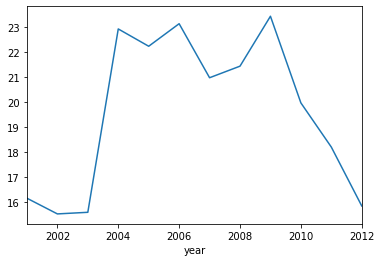

In [83]:
required[required["Location"]=="CasinoPoint"]["Temperature"].groupby(required["year"]).max().plot()

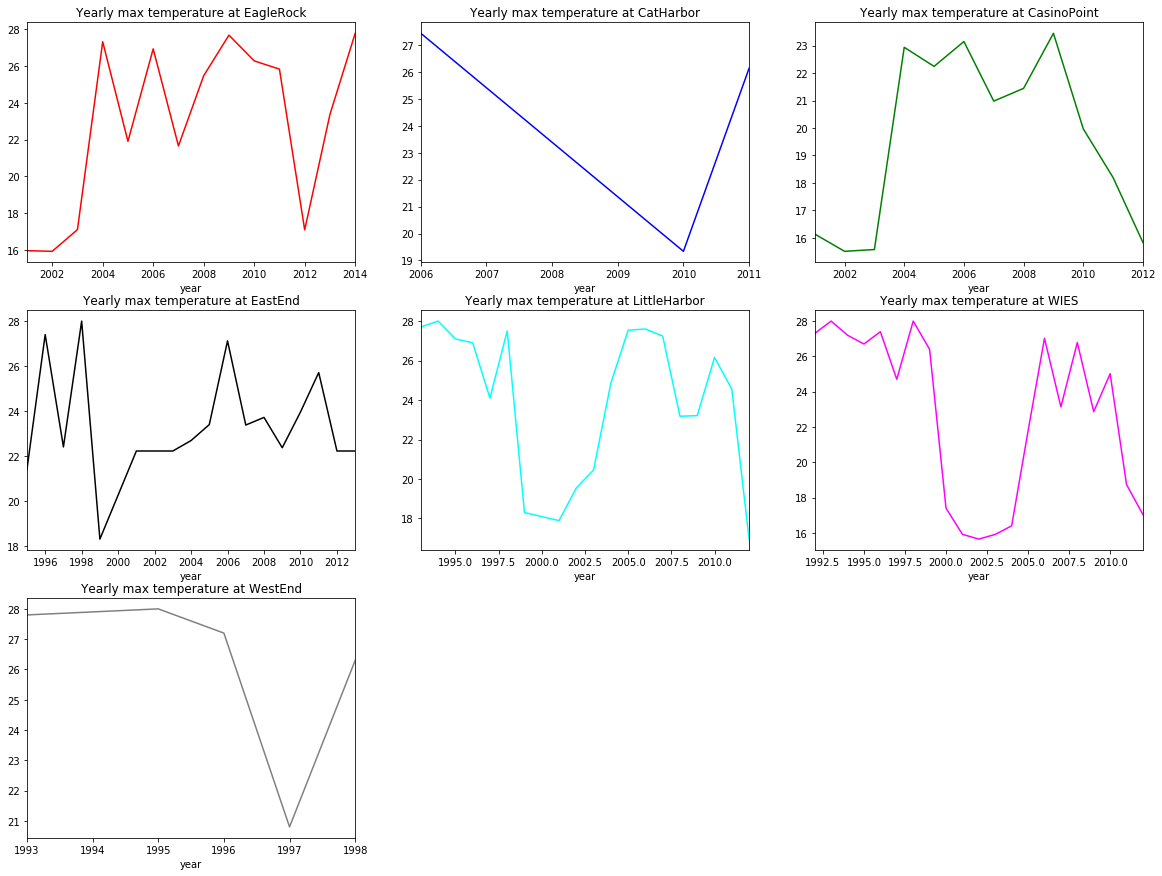

In [111]:
row = 3;col = 3;plot = 1
locations = list(required["Location"].unique())
colors = ["red","blue","green","black","cyan","magenta","grey"]
plt.figure(figsize=(20,15))
for l in locations:
    plt.subplot(row,col,plot)
    plt.title(("Yearly max temperature at "+l))
    ax = required[required["Location"]==l]["Temperature"].groupby(required["year"]).max().plot(color=colors[locations.index(l)])
    plot += 1

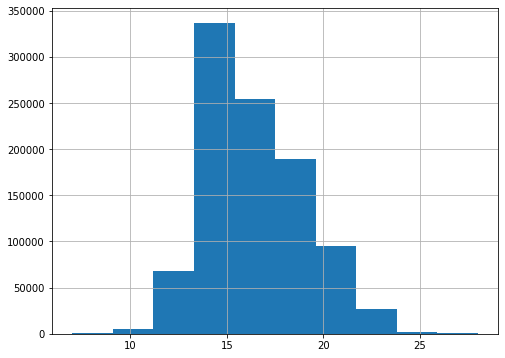

In [124]:
temp_series = required.sort_values(by=['year'])['Temperature']
plt.figure(figsize=(8,6))
temp_series.hist()

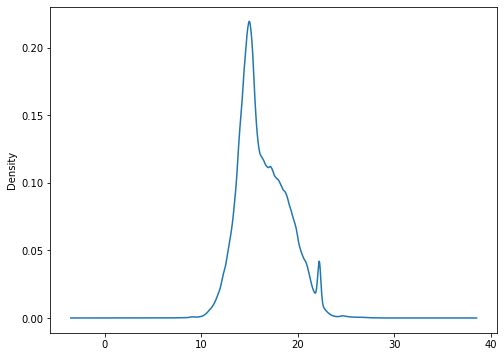

In [125]:
temp_series = required.sort_values(by=['year'])['Temperature']
plt.figure(figsize=(8,6))
temp_series.plot(kind="kde")